# decon by gradient descent

# generating ricker wavelet and reflectiviy series 

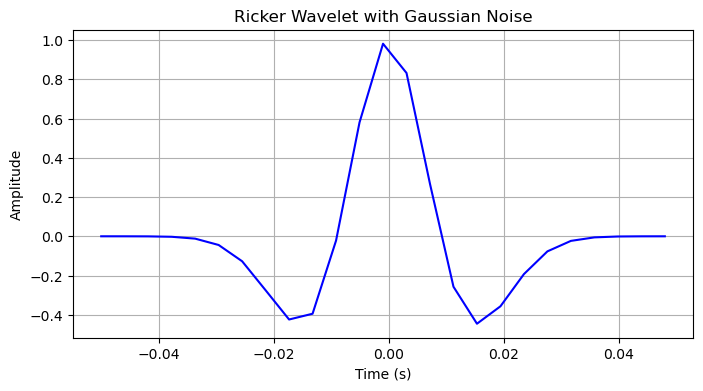

In [149]:
import numpy as np
import matplotlib.pyplot as plt

def ricker_wavelet(frequency, dt, length):
    t = np.linspace(-length/2, (length-dt)/2, int(length/dt))
    y = (1.0 - 2.0*(np.pi**2)*(frequency**2)*(t**2)) * np.exp(-(np.pi**2)*(frequency**2)*(t**2))
    return t, y


frequency = 25 
dt = 0.004
length = 0.1  
t, y = ricker_wavelet(frequency, dt, length)

r= (np.random.normal(0, 1, 20*len(y)))**7
r=r/max(r)
plt.figure(figsize=(8, 4))
plt.plot(t, y, color='blue')
plt.title('Ricker Wavelet with Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

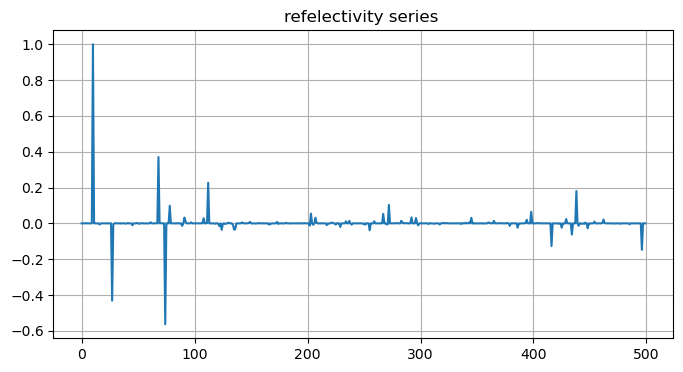

In [150]:
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('refelectivity series ')
plt.grid(True)
plt.show()

# data without noise 

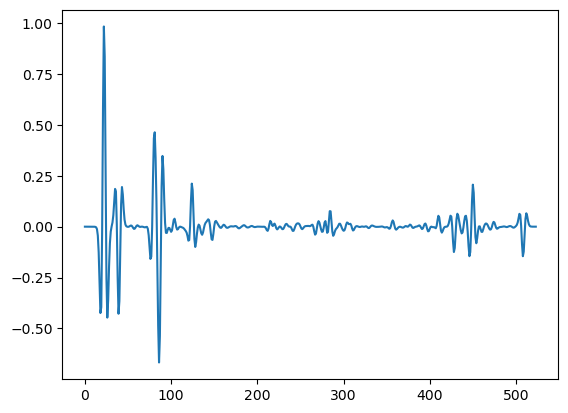

In [151]:
d=np.convolve(y,r)
plt.plot(d)

# data with noise 

(524,)

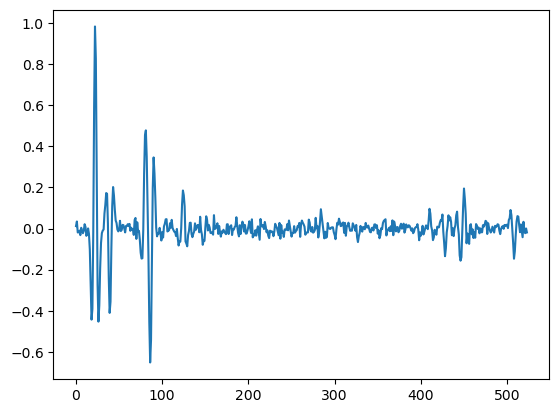

In [152]:
noise_std = 0.02
noise = np.random.normal(loc=0, scale=noise_std, size=d.shape)
dnew = d+ noise
d_new=dnew
# print("Original Data:", d)
# print("Noisy Data:", dnew)
plt.plot(dnew)
np.shape(dnew)

In [153]:

p=len(d)
q=len(y)
xo=np.hstack((np.zeros(p-q+1)))
#xo=xo.reshape(len(xo),1)
col=np.hstack((y,np.zeros(p-q)))
row=np.hstack((y[0],np.zeros(p-q)))
from scipy.linalg import toeplitz
A=toeplitz(col,row)
np.shape(A)



(524, 500)

(500,)

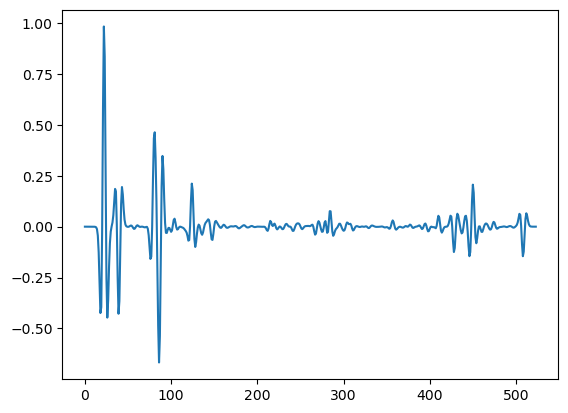

In [154]:
d1=np.dot(A,r)
plt.plot(d1)
np.shape(d1)
ss=np.dot(A.T,d1)
np.shape(xo)

# solution of without noise data

In [155]:
def decon(A,b,xo, Max_iter):
    x1=[]
    x2=[]
    mat_norm=[]
    i=0
    while i<Max_iter: 
        mat_norm.append(np.linalg.norm(b-np.dot(A,xo)))
#         x1.append(xo[0])
#         x2.append(xo[1])
        #r=(b-np.dot(A,xo))
        temp=b-np.dot(A,xo)
        r=np.dot(A.T,temp)
        beta= 0.1; #np.dot(r.T,r)/np.dot(r.T,np.dot(A.T,b))
        y=xo
        xo=xo+beta*r
        xnew=xo
        if np.linalg.norm(xnew-y)<0.0001:
            break
        else:
            i=i+1
            
    x_sol=xnew;
    final_iter=i;

    return x_sol, final_iter

In [156]:
def decon_reg(A,b,xo,my_lambda,Max_iter):
    x1=[]
    x2=[]
    mat_norm=[]
    i=0
    while i<Max_iter: 
        mat_norm.append(np.linalg.norm(b-np.dot(A,xo)))
#         x1.append(xo[0])
#         x2.append(xo[1])
        temp=(np.dot(A,xo)-b)
        r=np.dot(A.T,temp)+my_lambda*xo
        beta=0.1;#np.dot(r.T,r)/np.dot(r.T,np.dot(A.T,b))
        y=xo
        xo=xo-beta*r
        xnew=xo
        if np.linalg.norm(xnew-y)<0.0001:
            break
        else:
            i=i+1
            
    x_sol=xnew;
    final_iter=i;

    return x_sol, final_iter

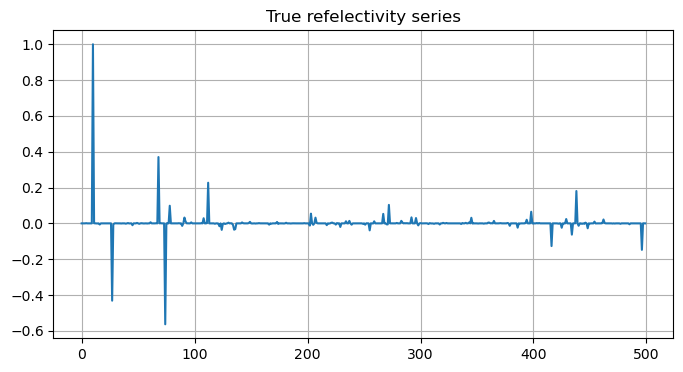

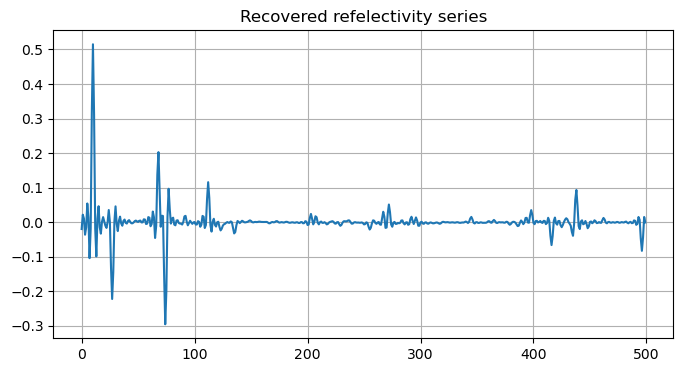

(500,)

In [157]:
Max_iter=500;
x_sol,final_iter=decon(A,d,xo,Max_iter)

#     p1=plt.plot(x2,x1 );
#plt.figure(1);
#plt.title('convergence curve ')
#p2=plt.plot(mat_norm );
#plt.figure(2)
#plt.title('solution without noise  ')
#p3=plt.plot(xo) 

plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_sol)
plt.title('Recovered refelectivity series')
plt.grid(True)
plt.show()
np.shape(x_sol)

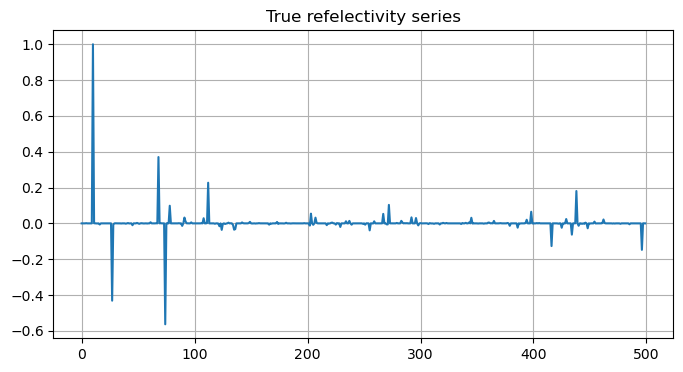

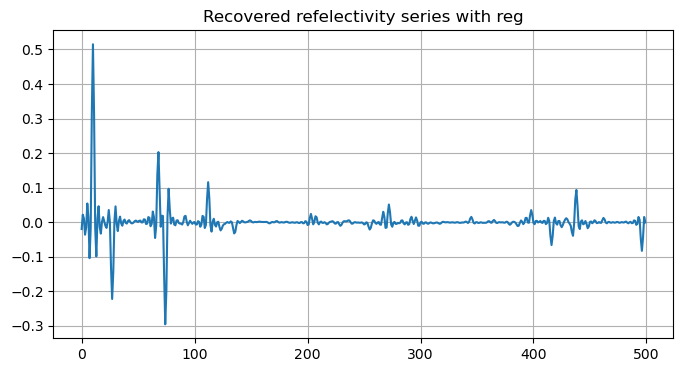

In [158]:
Max_iter=500;
my_lambda=0.0;
x_sol_reg,final_iter_reg=decon_reg(A,d,xo,my_lambda,Max_iter)


plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_sol)
plt.title('Recovered refelectivity series with reg')
plt.grid(True)
plt.show()

# solution of noisy data by gradient descent

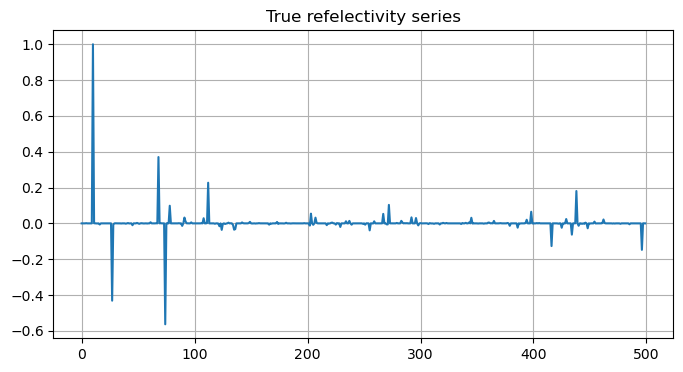

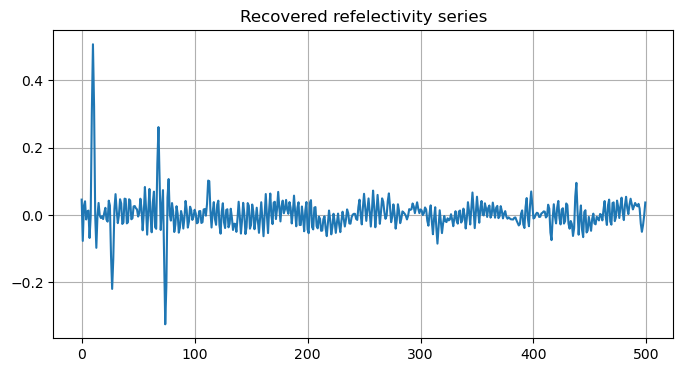

In [159]:
x_sol_noise, final_iter_noise=decon(A,dnew,xo,Max_iter)

plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_sol_noise)
plt.title('Recovered refelectivity series')
plt.grid(True)
plt.show()

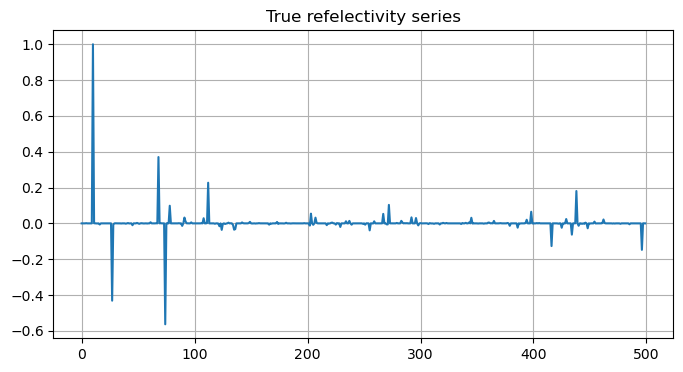

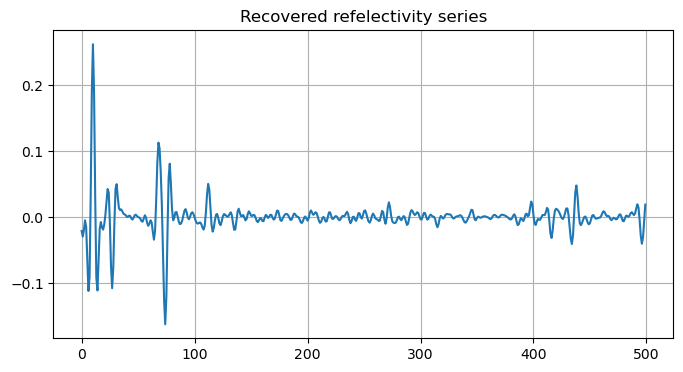

In [160]:
my_lambda=2;
x_sol_noise_reg, final_iter_noise_reg=decon_reg(A,dnew,xo,my_lambda,Max_iter)

plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_sol_noise_reg)
plt.title('Recovered refelectivity series')
plt.grid(True)
plt.show()

#  same problem by conjucate gradient

In [161]:
import numpy as np

def conjugate_gradient(A, b, xo, Max_iter,tol=0.000001):
    x = xo
    r = b - np.dot(A, x)
    d = r
    rs_old = np.dot(r.T, r)
    i=1
    mat_norm=[]
    while i<Max_iter:
        mat_norm.append(np.linalg.norm(b-np.dot(A,x)))
        Ad = np.dot(A, d)
        beta = rs_old / np.dot(d.T, Ad)
        x = x + beta * d
        r = r - beta * Ad
        rs_new = np.dot(r.T, r)
        if np.sqrt(rs_new) < tol:
            break
        d = r + (rs_new / rs_old) * d
        rs_old = rs_new
        i=i+1
        
    x_sol=x;
    final_iter=i;

    return x_sol, final_iter



In [162]:
x_sol_cg, final_iter_cg=conjugate_gradient(A, d, xo, Max_iter,tol=0.000001)

plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_sol_cg)
plt.title('Recovered refelectivity series')
plt.grid(True)
plt.show()

ValueError: shapes (524,500) and (524,) not aligned: 500 (dim 1) != 524 (dim 0)

# solution of noisy data by conjugate gradient

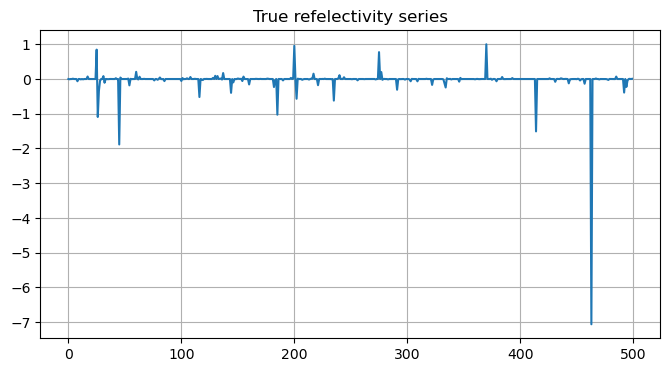

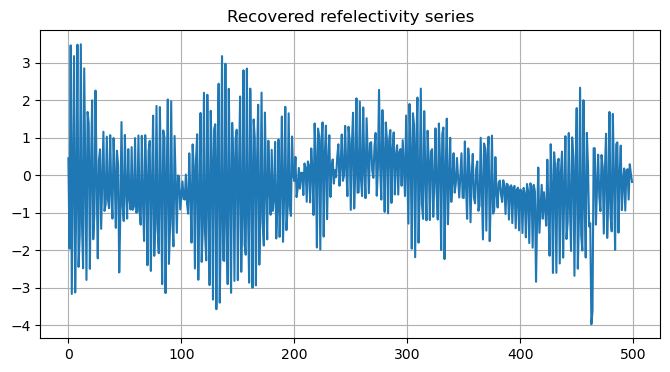

In [12]:
x_sol_cg_noise, final_iter_cg_noise=conjugate_gradient(A, dnew, xo, Max_iter,tol=0.000001)

plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('True refelectivity series')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_sol_cg_noise)
plt.title('Recovered refelectivity series')
plt.grid(True)
plt.show()